###AdaBoost

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
type(cancer['data'])

numpy.ndarray

In [ ]:
cancer['data'].shape

(569, 30)

In [ ]:
cancer['target'][cancer['target'] == 0].shape

(212,)

In [ ]:
cancer['target'][cancer['target'] == 1].shape

(357,)

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
x = df.drop('target',axis=1)
y = df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=42, stratify = y)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [ ]:
print(y_train.mean())
print(y_test.mean())

0.6267605633802817
0.6293706293706294


In [ ]:
shallow_tree = DecisionTreeClassifier(max_depth=3,random_state=100)

In [ ]:
shallow_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [ ]:
y_hat = shallow_tree.predict(x_test)
score = metrics.accuracy_score(y_test,y_hat)
score

0.9440559440559441

In [ ]:
estimators = list(range(1,50,3))

Ada_score = []

for i in estimators:
  ada = AdaBoostClassifier(base_estimator = shallow_tree, n_estimators = i, random_state= 100)
  ada.fit(x_train,y_train)
  y_hat_ada = ada.predict(x_test)
  score = metrics.accuracy_score(y_test,y_hat_ada)*100
  Ada_score.append(score)

In [ ]:
fig = px.line(x = estimators, y =  Ada_score , template = 'ggplot2' , labels = {'x':'Estimators','y':'Accuracy_Score'})
fig.show()

###XG Boost for classification

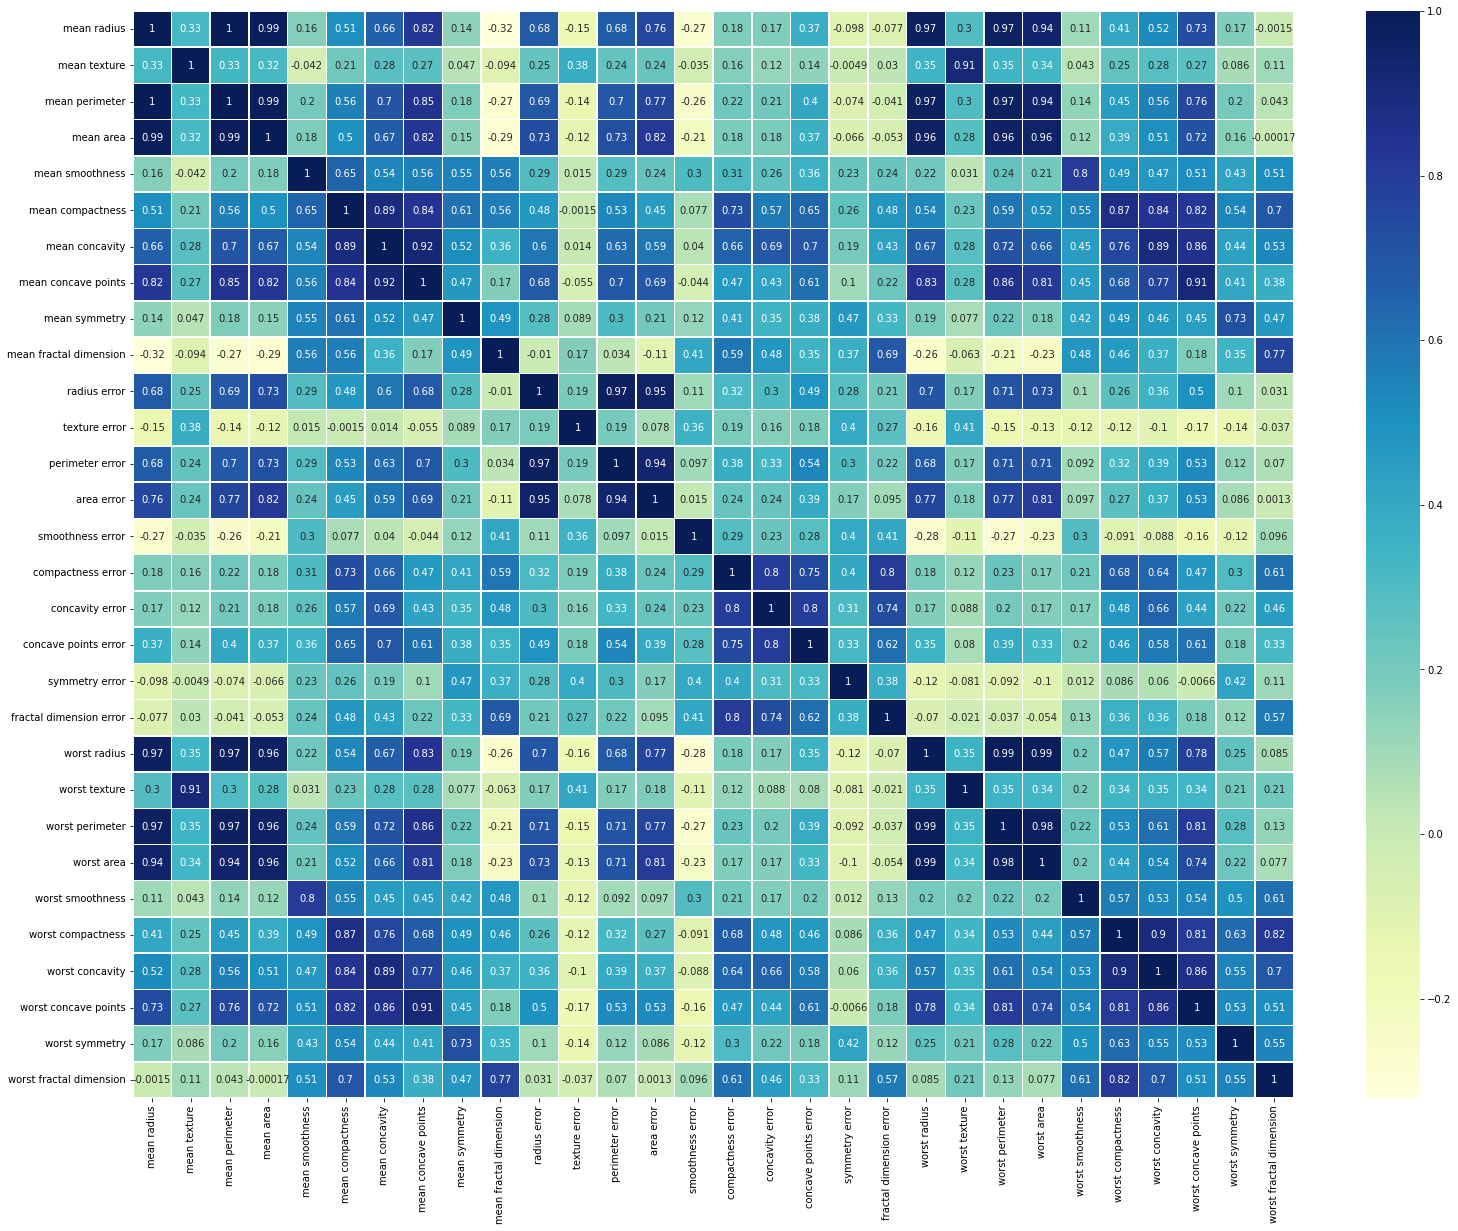

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (26,20))
sns.heatmap(x_train.corr(),annot = True , linewidths=.5, cmap="YlGnBu")

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [ ]:
print(y_train.value_counts())

1    267
0    159
Name: target, dtype: int64


In [ ]:
print(y_test.value_counts())

1    90
0    53
Name: target, dtype: int64


In [ ]:
import xgboost as xg
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

classifier = xg.XGBClassifier()

In [ ]:
### Hyperparameter tuning
parameter = { 'learning_rate' : [0.01,0.1,0.2,0.3],
             'max_depth' : [3,5,6],
             'min_child_weight' : [1,2],
             'n_estimators' : [50,75,100]
             }

scorer = metrics.make_scorer(score_func = metrics.roc_auc_score,greater_is_better=True,needs_proba=True)

cross_val = GridSearchCV(estimator = classifier,
                         param_grid = parameter,
                         scoring=scorer,
                         cv=3, n_jobs =-1,verbose=2)

In [ ]:
cross_val.fit(x_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 6], 'min_child_weight': [1, 2],
                         'n_estimators': [50, 75, 100]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=2)

In [ ]:
print(cross_val.best_estimator_)
print(cross_val.best_params_)
print(cross_val.best_score_)

XGBClassifier(n_estimators=75)
{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 75}
0.9879513815278073


In [ ]:
optimal_xgb_classifier = xg.XGBClassifier( learning_rate= 0.1, max_depth= 3, min_child_weight= 1, n_estimators= 75)


optimal_xgb_classifier.fit(x_train,y_train)

print(metrics.roc_auc_score(y_train,optimal_xgb_classifier.predict_proba(x_train)[:,1]))
print(metrics.roc_auc_score(y_test,optimal_xgb_classifier.predict_proba(x_test)[:,1]))

1.0
0.9935010482180294


###XGBoost Regression

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
housing = load_boston()
housing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
housing_df = pd.DataFrame(housing.data,columns = housing.feature_names)
housing_df['target'] = housing.target
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
x_housing = housing_df.drop('target',axis =1)
y_housing = housing_df['target']

In [ ]:
from pandas.core.common import random_state
X_train , X_test, Y_train, Y_test = train_test_split(x_housing, y_housing, shuffle=True,random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


In [ ]:
regressor = xg.XGBRegressor()

params = {'learning_rate' : [0.01,0.1,0.2,0.3,0.4,0.5],
          'max_depth' : [2,3,4,5],
          'gamma' : [0,1,2,4],
          'min_child_weight' : [1,2,3,6],
          'reg_lambda':[0.001,0.01,0.1,1],
          'n_estimators' : [50,75,85,100,120] }

cross_val_regressor = GridSearchCV(estimator = regressor,param_grid=params ,cv=3,n_jobs=-1 ,verbose=2)

In [ ]:
cross_val_regressor.fit(X_train,Y_train)

Fitting 3 folds for each of 7680 candidates, totalling 23040 fits
[10:29:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'gamma': [0, 1, 2, 4],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3, 6],
                         'n_estimators': [50, 75, 85, 100, 120],
                         'reg_lambda': [0.001, 0.01, 0.1, 1]},
             verbose=2)

In [ ]:
print(cross_val_regressor.best_estimator_)
print(cross_val_regressor.best_params_)
print(cross_val_regressor.best_score_)

XGBRegressor(learning_rate=0.4, max_depth=4, min_child_weight=6,
             n_estimators=75)
{'gamma': 0, 'learning_rate': 0.4, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 75, 'reg_lambda': 1}
0.855302620433331


In [ ]:
optimized_xgr = xg.XGBRegressor(gamma= 2, learning_rate= 0.3, max_depth= 3, min_child_weight= 1, n_estimators= 75)
optimized_xgr.fit(X_train,Y_train)

[11:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=2, learning_rate=0.3, n_estimators=75)

In [ ]:
print('R2 Train',metrics.r2_score(Y_train,optimized_xgr.predict(X_train)))
print('R2 Test',metrics.r2_score(Y_test,optimized_xgr.predict(X_test)))

R2 Train 0.9876895365757884
R2 Test 0.882749578827096
